# Using decision trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

RANDOM_STATE = 55

In [2]:
df: pd.DataFrame = pd.read_csv("./data/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isnull().sum().sum()

0

In [4]:
# One hot encoding
# cols for one hot encoding
cols = ["Sex", "ChestPainType", "RestingECG", "ST_Slope", "ExerciseAngina"] # Convert everything to 0 or 1 or True or False
df= pd.get_dummies(df, columns=cols)

In [5]:
df.shape

(918, 21)

In [6]:
features = [x for x in df.columns if x != "HeartDisease"]
features

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up',
 'ExerciseAngina_N',
 'ExerciseAngina_Y']

In [7]:
X_train, X_cv, y_train, y_cv = train_test_split(df[features], df["HeartDisease"], train_size=0.8, random_state=RANDOM_STATE)

In [8]:
min_samples_split_list: list[int] = [
    2,
    10,
    30,
    50,
    100,
    200,
    300,
    700,
]  # minimum number of examples in each node for it to split
max_depth_list: list[int | None] = [
    1,
    2,
    3,
    4,
    8,
    16,
    32,
    64,
    None,
]  # None means that there is no depth limit.

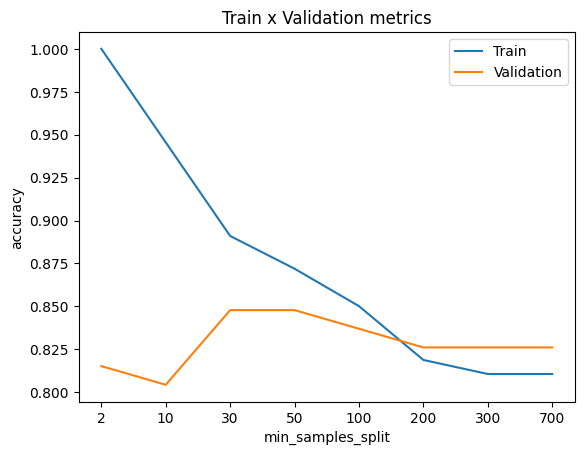

In [49]:
n: int = len(min_samples_split_list)

train_accuracy: list[float] = []
cv_accuracy: list[float] = []

for i in range(n):
    tree = DecisionTreeClassifier(min_samples_split=min_samples_split_list[i])
    model = tree.fit(X_train, y_train)
    train = model.predict(X_train)
    cv = model.predict(X_cv)
    train_accuracy.append(float(accuracy_score(y_train, train)))
    cv_accuracy.append(float(accuracy_score(y_cv, cv)))

    
plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['Train','Validation'])
plt.show()
# Reduction in over fitting

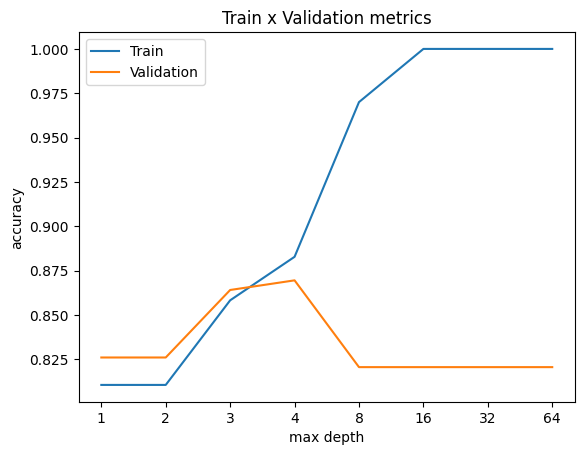

In [10]:
train_accuracy: list[float] = []
cv_accuracy: list[float] = []

for i in range(n):
    tree = DecisionTreeClassifier(max_depth=max_depth_list[i])
    model = tree.fit(X_train, y_train)
    train = model.predict(X_train)
    cv = model.predict(X_cv)
    train_accuracy.append(float(accuracy_score(y_train, train)))
    cv_accuracy.append(float(accuracy_score(y_cv, cv)))

    
plt.title('Train x Validation metrics')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list)
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['Train','Validation'])
plt.show()
# Increment in over fitting as depth increases

In [11]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=50)
tree.fit(X_train, y_train)
pred = tree.predict(X_cv)
accuracy_score(y_cv, pred)

0.8695652173913043

## Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

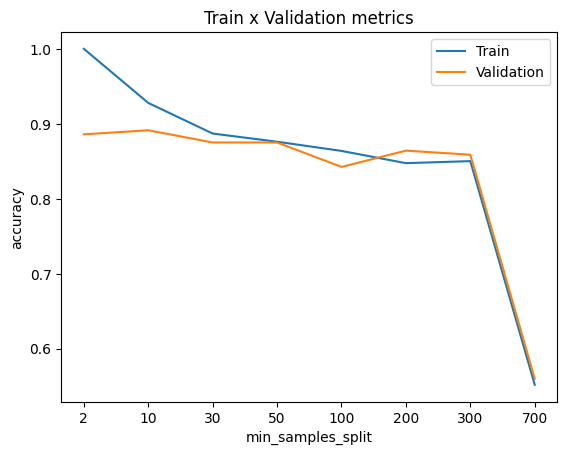

In [14]:
train_accuracy = []
cv_accuracy = []

for min_sample_split in min_samples_split_list:
    model = RandomForestClassifier(
        min_samples_split=min_sample_split, random_state=RANDOM_STATE
    ).fit(X_train, y_train)
    train = model.predict(X_train)
    cv = model.predict(X_cv)
    train_accuracy.append(accuracy_score(y_train, train))
    cv_accuracy.append(accuracy_score(y_cv, cv))


plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['Train','Validation'])
plt.show()

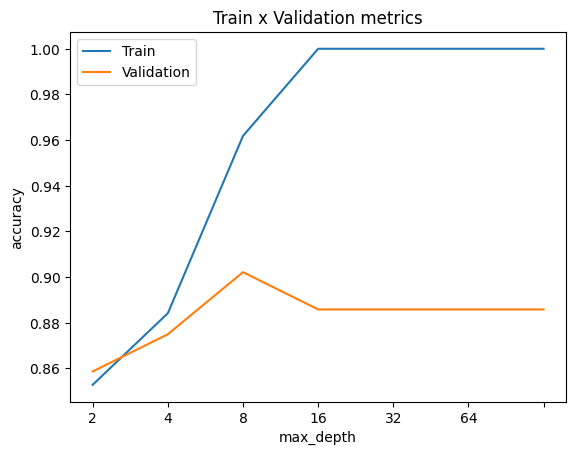

In [15]:
train_accuracy = []
cv_accuracy = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(
        max_depth=max_depth, random_state=RANDOM_STATE
    ).fit(X_train, y_train)
    train = model.predict(X_train)
    cv = model.predict(X_cv)
    train_accuracy.append(accuracy_score(y_train, train))
    cv_accuracy.append(accuracy_score(y_cv, cv))


plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list) 
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['Train','Validation'])
plt.show()

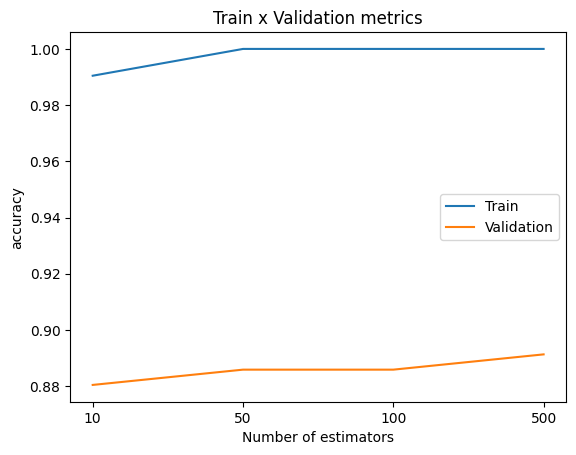

In [16]:
train_accuracy = []
cv_accuracy = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(
        n_estimators=n_estimators, random_state=RANDOM_STATE
    ).fit(X_train, y_train)
    train = model.predict(X_train)
    cv = model.predict(X_cv)
    train_accuracy.append(accuracy_score(y_train, train))
    cv_accuracy.append(accuracy_score(y_cv, cv))


plt.title('Train x Validation metrics')
plt.xlabel('Number of estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list) 
plt.plot(train_accuracy)
plt.plot(cv_accuracy)
plt.legend(['Train','Validation'])
plt.show()

In [17]:
random_forest_model = RandomForestClassifier(n_estimators = 100,
                                             max_depth = 16, 
                                             min_samples_split = 10).fit(X_train,y_train)

In [18]:
print(
    f"Metrics train:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_forest_model.predict(X_cv),y_cv):.4f}"
)

Metrics train:
	Accuracy score: 0.9292
Metrics test:
	Accuracy score: 0.8804


## XGBoost 

### Gradient Boosting Library

- has learning rate -> how much to update weight of wrong answers (to emphasize how much?)
- Also takes in evaluation dataset -> CV set and based on that performs readjustment => [(X_eval, y_eval)] list of eval sets with tuples of X_eval and y_eval
- If validation metric does not improve a lot -> stops iterations = avoiding over-fitting

In [19]:
n = int(len(X_train)*0.8) ## Let's use 80% to train and 20% to eval

In [21]:
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]
len([(X_train_eval, y_train_eval)])

1

In [ ]:
# Early stopping rounds = 10 (eg.)
"""
If the best iteration was iteration 16 then model will try to run for 10 more iterations and if none is better than 16th it will stop at iteration 26
"""

In [48]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=RANDOM_STATE, early_stopping_rounds=10)
xgb_model.fit(X_train, y_train, eval_set=[(X_train_eval, y_train_eval)])

xgb_model.best_iteration

[0]	validation_0-logloss:0.62067
[1]	validation_0-logloss:0.57283
[2]	validation_0-logloss:0.53489
[3]	validation_0-logloss:0.50079
[4]	validation_0-logloss:0.47058
[5]	validation_0-logloss:0.44497
[6]	validation_0-logloss:0.42131
[7]	validation_0-logloss:0.39863
[8]	validation_0-logloss:0.38083
[9]	validation_0-logloss:0.36343
[10]	validation_0-logloss:0.34824
[11]	validation_0-logloss:0.33303
[12]	validation_0-logloss:0.32032
[13]	validation_0-logloss:0.30888
[14]	validation_0-logloss:0.29739
[15]	validation_0-logloss:0.28721
[16]	validation_0-logloss:0.27793
[17]	validation_0-logloss:0.27097
[18]	validation_0-logloss:0.26219
[19]	validation_0-logloss:0.25442
[20]	validation_0-logloss:0.24462
[21]	validation_0-logloss:0.23717
[22]	validation_0-logloss:0.22979
[23]	validation_0-logloss:0.22254
[24]	validation_0-logloss:0.21989
[25]	validation_0-logloss:0.21414
[26]	validation_0-logloss:0.20983
[27]	validation_0-logloss:0.20590
[28]	validation_0-logloss:0.20054
[29]	validation_0-loglos

499

In [50]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(y_cv, xgb_model.predict(X_cv)):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.8804
